In [86]:
import pandas as pd
import matplotlib.pyplot as plt

from SLBPPG import PPGFilter
from SLBPPG import StressIndex

Reading data

In [87]:
data = pd.read_csv('./test_data.csv')

ppg_fr = 256
sec_with = 0
num_sec = 60

ppg = data["afe_LED1ABSVAL"][sec_with * ppg_fr: (sec_with + num_sec) * ppg_fr]

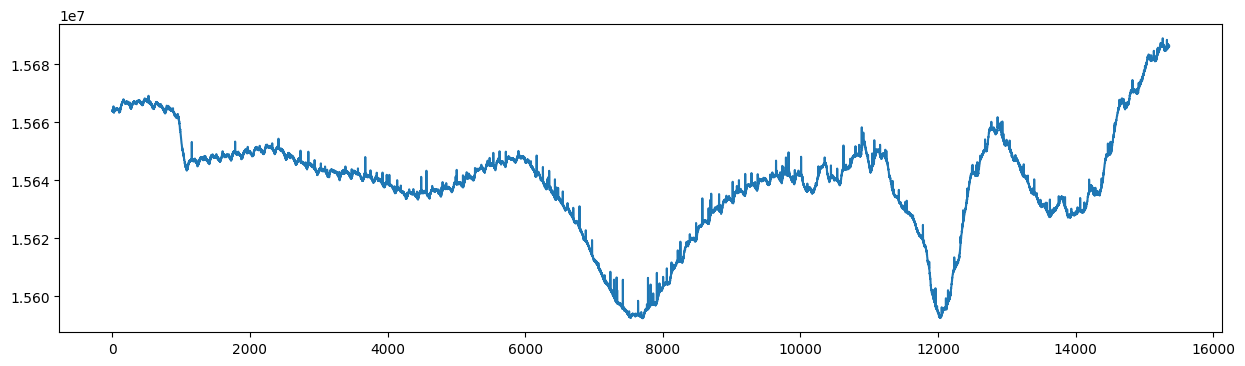

In [88]:
plt.figure(figsize=(15, 4))
plt.plot(ppg)
plt.show()

Creating the filter

In [89]:
ppg_filter = PPGFilter()
filt_ppg, _ = ppg_filter.filter(ppg=ppg, ppg_fr=256)

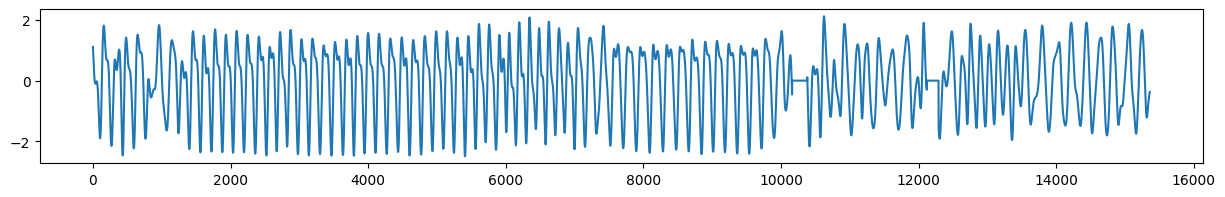

In [90]:
plt.figure(figsize=(15, 2))
plt.plot(filt_ppg)
plt.show()

Creating an object for predicting stress levels

In [91]:
path_to_model = '../scr/catboost_model.cbm'
model = StressIndex(path_to_model)
model.predict(filt_ppg, 256)

array([1.28983115, 1.04857182, 1.22111124, 2.2485129 ])

The output is an array where each value is a stress index for one window.